In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('all_data.csv')

In [3]:
df.shape

(186850, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

#### Data Cleaning

In [7]:
null_data = df[df.isnull().any(axis=1)]
null_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data = df.copy()
data = data.dropna()

print(data.isnull().sum())
data.head()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
data.shape

(186305, 6)

In [11]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [12]:
data = data.loc[data['Quantity Ordered'] != 'Quantity Ordered']

#### Creating city column

In [13]:
data['City'] = data['Purchase Address'].str.split(',').str.get(1)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles


#### Convert Order Date to datetime

In [14]:
data = data[data['Order Date'].str[0:2] != 'Or']

In [15]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   City              185950 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 11.3+ MB


In [17]:
print('Minimum Date', data['Order Date'].min())
print('Maximum Date', data['Order Date'].max())

Minimum Date 2019-01-01 03:07:00
Maximum Date 2020-01-01 05:13:00


Convert Price and Quantity to numeric type

In [18]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 11.3+ MB


#### Creating month column

In [20]:
data['Month'] = data['Order Date'].dt.month
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,4


#### Creating Total Sales column by Price Each * Quantity Ordered

In [21]:
data['Total'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Total
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,4,11.99


#### Exploratory Data Analysis

In [22]:
data = data.loc[data['Order Date'] < '2020-01-01']

print('Minimum Date', data['Order Date'].min())
print('Maximum Date', data['Order Date'].max())

Minimum Date 2019-01-01 03:07:00
Maximum Date 2019-12-31 23:53:00


Daily Sales Overview

In [23]:
# plt.figure(figsize=(10,5))
# sns.lineplot(data= ts['Total'])
# plt.xlabel('')
# plt.ylabel('Sales')
# plt.title('Daily Sales 2019')

What was the best month for sales?

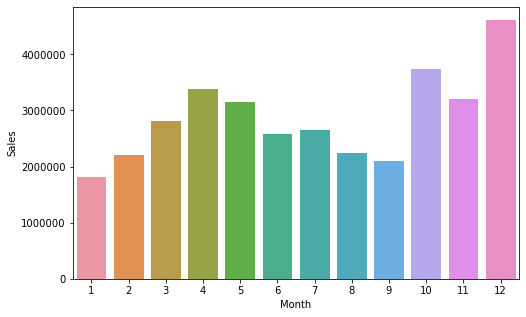

In [24]:
plt.figure(figsize=(8,5))
monthly_sales = data.groupby('Month')['Total'].sum().reset_index()
sns.barplot(x='Month', y='Total', data=monthly_sales)
plt.ticklabel_format(style='plain', axis='y')
# plt.title('Monthly Sales 2019-2020')
plt.ylabel('Sales')
# plt.show()
plt.savefig('Best Month')

In [25]:
data['New Date'] = data['Order Date'].dt.strftime('%Y-%m-%d')

In [26]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Total,New Date
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,4,23.90,2019-04-19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,4,99.99,2019-04-07
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4,600.00,2019-04-12
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4,11.99,2019-04-12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,4,11.99,2019-04-30


Daily Sales

In [27]:
# daily_sales

In [28]:
data['Order Date'].max()

Timestamp('2019-12-31 23:53:00')

In [29]:
# daily_sales.iloc[-1]

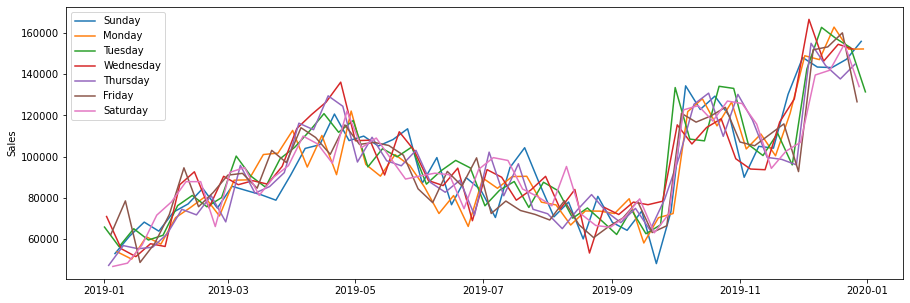

In [30]:
daily_sales = data.set_index('Order Date')['Total'].resample('D').sum().reset_index()
daily_sales = daily_sales.set_index('Order Date')
daily_sales['Weekday'] = daily_sales.index.strftime('%A')

# Plot the graph
plt.figure(figsize=(15,5))
sns.lineplot(x='Order Date', y='Total', hue='Weekday', hue_order = daily_sales.iloc[5:].Weekday.unique(), 
             data=daily_sales.reset_index())
# plt.title('Daily Sales')
plt.legend(loc='best')
plt.xlabel('')
plt.ylabel('Sales')
# plt.show()
plt.savefig('Daily sales pattern')

What time users most likely made a transactions?

In [31]:
# Add hour column
data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour
data['Minute'] = pd.to_datetime(data['Order Date']).dt.minute
data['Count'] = 1
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Total,New Date,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,4,23.90,2019-04-19,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,4,99.99,2019-04-07,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4,600.00,2019-04-12,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4,11.99,2019-04-12,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,4,11.99,2019-04-30,9,27,1


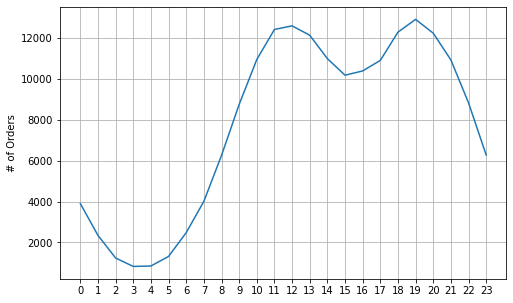

In [32]:
keys = [pair for pair, df in data.groupby(['Hour'])]

plt.figure(figsize=(8,5))
sns.lineplot(keys, data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.ylabel('# of Orders')
plt.grid()
# plt.show()
plt.savefig('Hour Orders')

In [33]:
data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Total,New Date,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,4,23.9,2019-04-19,8,46,1


### Pivot Table Orders

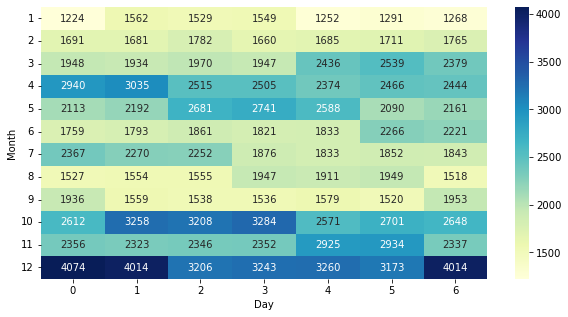

In [34]:
orders = pd.crosstab(data['Order Date'].dt.month, data['Order Date'].dt.dayofweek, 
           values=data['Order ID'], aggfunc='count').round(0).fillna(0)

plt.figure(figsize=(10,5))
sns.heatmap(orders, annot=True, cmap='YlGnBu', fmt='.5g', cbar=True)
plt.ylabel('Month')
plt.xlabel('Day')
plt.yticks(rotation=0)
plt.savefig('Most Traffic Orders')
plt.show()

### Pivot Table Revenue

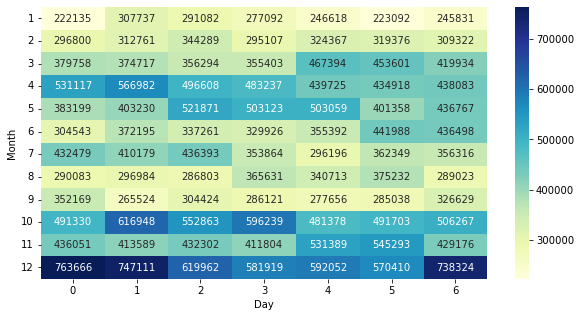

In [35]:
orders = pd.crosstab(data['Order Date'].dt.month, data['Order Date'].dt.dayofweek, 
           values=data['Total'], aggfunc='sum').round(0).fillna(0)

plt.figure(figsize=(10,5))
sns.heatmap(orders, annot=True, cmap='YlGnBu', fmt='g', cbar=True)
plt.ylabel('Month')
plt.xlabel('Day')
plt.yticks(rotation=0)
plt.show()

In [36]:
orders

Order Date,0,1,2,3,4,5,6
Order Date,,,,,,,
1,222135.0,307737.0,291082.0,277092.0,246618.0,223092.0,245831.0
2,296800.0,312761.0,344289.0,295107.0,324367.0,319376.0,309322.0
3,379758.0,374717.0,356294.0,355403.0,467394.0,453601.0,419934.0
4,531117.0,566982.0,496608.0,483237.0,439725.0,434918.0,438083.0
5,383199.0,403230.0,521871.0,503123.0,503059.0,401358.0,436767.0
6,304543.0,372195.0,337261.0,329926.0,355392.0,441988.0,436498.0
7,432479.0,410179.0,436393.0,353864.0,296196.0,362349.0,356316.0
8,290083.0,296984.0,286803.0,365631.0,340713.0,375232.0,289023.0
9,352169.0,265524.0,304424.0,286121.0,277656.0,285038.0,326629.0


In [37]:
# data.head()

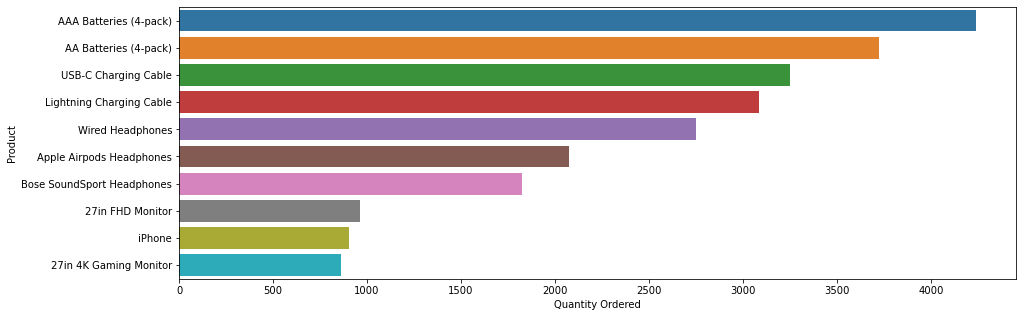

In [38]:
december = data[(data['New Date'] >= '2019-12-01') & (data['New Date'] <= '2019-12-31')]
december_products = december.groupby('Product')['Quantity Ordered'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x='Quantity Ordered', y='Product', data=december_products.sort_values(by='Quantity Ordered', ascending=False).head(10))
plt.savefig('Top 10 Items')

In [39]:
december_products

,Product,Quantity Ordered
0,20in Monitor,569
1,27in 4K Gaming Monitor,864
2,27in FHD Monitor,962
3,34in Ultrawide Monitor,849
4,AA Batteries (4-pack),3724
5,AAA Batteries (4-pack),4241
6,Apple Airpods Headphones,2076
7,Bose SoundSport Headphones,1824
8,Flatscreen TV,666
9,Google Phone,715


Text(0, 0.5, '')

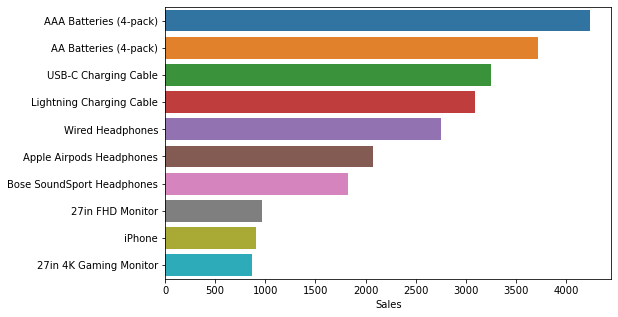

In [40]:
december = data[(data['New Date'] >= '2019-12-01') & (data['New Date'] <= '2019-12-31')]
december_products_sales = december.groupby('Product')['Quantity Ordered'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='Quantity Ordered', y='Product', data=december_products_sales.sort_values(by='Quantity Ordered', ascending=False).head(10))
plt.xlabel('Sales')
plt.ylabel('')

In [41]:
december_products_sales

,Product,Quantity Ordered
0,20in Monitor,569
1,27in 4K Gaming Monitor,864
2,27in FHD Monitor,962
3,34in Ultrawide Monitor,849
4,AA Batteries (4-pack),3724
5,AAA Batteries (4-pack),4241
6,Apple Airpods Headphones,2076
7,Bose SoundSport Headphones,1824
8,Flatscreen TV,666
9,Google Phone,715


Text(0, 0.5, '')

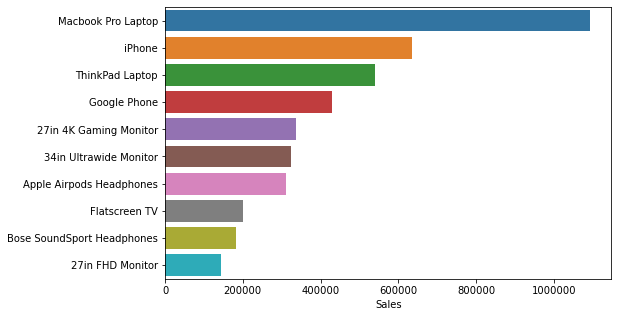

In [42]:
december = data[(data['New Date'] >= '2019-12-01') & (data['New Date'] <= '2019-12-31')]
december_products_sales = december.groupby('Product')['Total'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(x='Total', y='Product', data=december_products_sales.sort_values(by='Total', ascending=False).head(10))
plt.xlabel('Sales')
plt.ylabel('')

In [43]:
laptops = ['Macbook Pro Laptop','ThinkPad Laptop']
phones = ['iPhone','Vareebadd Phone','Google Phone']
monitors = ['27in 4K Gaming Monitor','34in Ultrawide Monitor','27in FHD Monitor','20in Monitor','Flatscreen TV']
headphones = ['Apple Airpods Headphones','Bose SoundSport Headphones','Wired Headphones']
batteries = ['AAA Batteries (4-pack)','AA Batteries (4-pack)']
charging_cable = ['USB-C Charging Cable','Lightning Charging Cable']
washing_and_dryer = ['LG Washing Machine','LG Dryer']

In [44]:
category = []

for items in data['Product']:
    if (items == 'Macbook Pro Laptop') or (items == 'ThinkPad Laptop'):
        category.append('Laptops')
    elif (items == 'iPhone') or (items == 'Vareebadd Phone') or (items == 'Google Phone'):
        category.append('Phones')
    elif (items == '27in 4K Gaming Monitor') or (items=='34in Ultrawide Monitor') or (items=='27in FHD Monitor') or (items=='20in Monitor') or (items=='Flatscreen TV'):
        category.append('Monitors and TV')
    elif( items == 'Apple Airpods Headphones') or (items=='Bose SoundSport Headphones') or (items=='Wired Headphones'):
        category.append('Headphones')
    elif (items == 'AAA Batteries (4-pack)') or (items=='AA Batteries (4-pack)'):
        category.append('Batteries')
    elif (items == 'USB-C Charging Cable') or items ==('Lightning Charging Cable'):
        category.append('Charging Cables')
    elif (items == 'LG Washing Machine') or (items =='LG Dryer'):
        category.append('Washing and Dryer Machines')
        

In [45]:
data['category'] = category

In [46]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Total,New Date,Hour,Minute,Count,category
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,4,23.90,2019-04-19,8,46,1,Charging Cables
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,4,99.99,2019-04-07,22,30,1,Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4,600.00,2019-04-12,14,38,1,Phones
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4,11.99,2019-04-12,14,38,1,Headphones
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,4,11.99,2019-04-30,9,27,1,Headphones


In [47]:
data['category'].value_counts()

Headphones                    47748
Charging Cables               43552
Batteries                     41215
Monitors and TV               28812
Phones                        14428
Laptops                        8849
Washing and Dryer Machines     1312
Name: category, dtype: int64

In [48]:
# # Regroup for top 5 items
# date_item_df = pd.DataFrame(data.loc[
#      data['Product'].isin(items)
#     ].set_index('Order Date').groupby([
#         pd.Grouper(freq='M'), 'Product'
#     ])['Quantity Ordered'].sum()
# )
# date_item_df

In [49]:
date_cat = data.set_index('Order Date').groupby([pd.Grouper(freq='M'), 'category'])['Quantity Ordered'].sum()

In [50]:
category_items = date_cat.reset_index().pivot('Order Date','category').fillna(0)

category_items = category_items.reset_index()
category_items = category_items.set_index('Order Date')
category_items.columns = category_items.columns.droplevel(0)

category_items

category,Batteries,Charging Cables,Headphones,Laptops,Monitors and TV,Phones,Washing and Dryer Machines
Order Date,,,,,,,
2019-01-31,3019,2432,2554,451,1503,822,81
2019-02-28,3707,3153,3132,551,1879,949,78
2019-03-31,4695,3817,4184,724,2297,1175,113
2019-04-30,5760,4642,4871,844,2809,1493,139
2019-05-31,5311,4143,4417,836,2515,1305,140
2019-06-30,4258,3362,3624,670,2162,1079,98
2019-07-31,4436,3660,3845,687,2278,1059,107
2019-08-31,3849,2905,3181,573,1903,943,94
2019-09-30,3694,3026,3098,537,1814,864,76


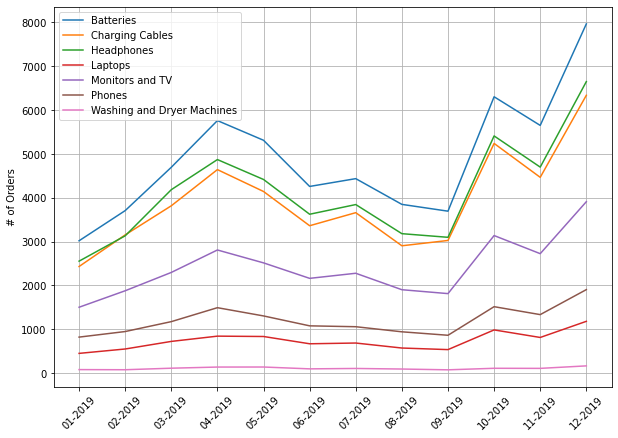

In [51]:
ax = pd.DataFrame(category_items.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('# of Orders')
ax.set_xlabel('')
# ax.set_title('Categories Trends over Time')

ax.legend(category_items.columns, loc='upper left')

plt.xticks(
    range(len(category_items.index)), 
    [x.strftime('%m-%Y') for x in category_items.index], 
    rotation=45
)

# plt.show()
plt.savefig('Categories Trend')

In [52]:
data.groupby('Product')['Quantity Ordered'].sum().reset_index().sort_values(by='Quantity Ordered', ascending=False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31012
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23971
12,Lightning Charging Cable,23211
17,Wired Headphones,20553
6,Apple Airpods Headphones,15657
7,Bose SoundSport Headphones,13454
2,27in FHD Monitor,7547
18,iPhone,6847
1,27in 4K Gaming Monitor,6243


In [53]:
data.groupby('category')['Quantity Ordered'].sum()

category
Batteries                     58647
Charging Cables               47182
Headphones                    49664
Laptops                        8855
Monitors and TV               28933
Phones                        14445
Washing and Dryer Machines     1312
Name: Quantity Ordered, dtype: int64

In [54]:
# december_products_sales.sort_values(by='Total', ascending=False)

What City has the highest revenue?

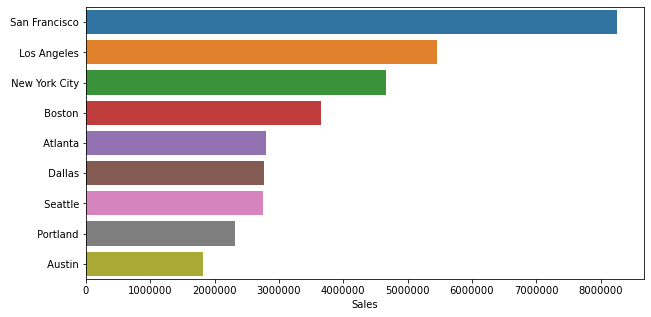

In [55]:
plt.figure(figsize=(10,5))
cities_sales = data.groupby('City')['Total'].sum().reset_index()
sns.barplot(x='Total', y='City', data=cities_sales.sort_values(by='Total', ascending=False))
plt.ticklabel_format(style='plain', axis='x')
# plt.title('Revenue per City')
plt.ylabel('')
plt.xlabel('Sales')
plt.savefig('revenue_per_city')
plt.show()

In [56]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Total,New Date,Hour,Minute,Count,category
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,4,23.90,2019-04-19,8,46,1,Charging Cables
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,4,99.99,2019-04-07,22,30,1,Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4,600.00,2019-04-12,14,38,1,Phones
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,4,11.99,2019-04-12,14,38,1,Headphones
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,4,11.99,2019-04-30,9,27,1,Headphones


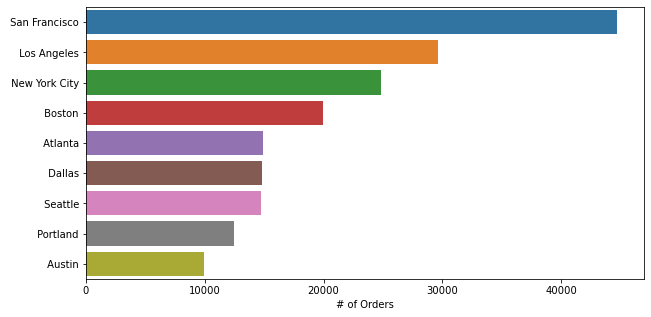

In [57]:
plt.figure(figsize=(10,5))
cities_by_quantity = data.groupby('City')['Order ID'].count().reset_index()
sns.barplot(x='Order ID', y='City', data=cities_by_quantity.sort_values(by='Order ID', ascending=False))
plt.ticklabel_format(style='plain', axis='x')
# plt.title('Revenue per City')
plt.ylabel('')
plt.xlabel('# of Orders')
plt.savefig('orders_per_city')
plt.show()

What products are most often sold together?

In [58]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = data[data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(20):
    print(key, value)
    

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

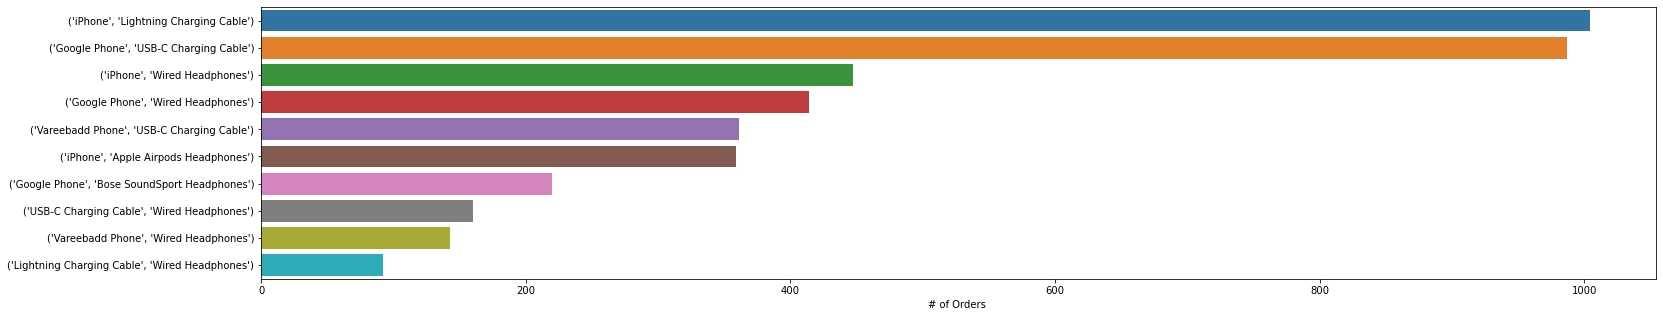

In [59]:
plt.figure(figsize=(25,5))
items_sold_together = pd.DataFrame(count.most_common(10), columns=['Items','Sold'])
sns.barplot(x='Sold', y='Items', data=items_sold_together)
plt.ylabel('')
plt.xlabel('# of Orders ')
plt.savefig('bundle items')
plt.show()

What products are sales the most?

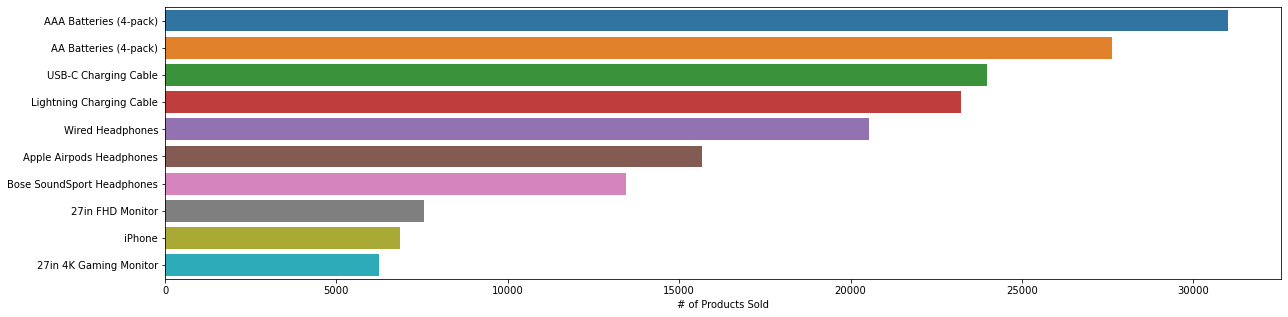

In [60]:
plt.figure(figsize=(20,5))
product_by_orders = data.groupby('Product')['Quantity Ordered'].sum().reset_index()
sns.barplot(x='Quantity Ordered', y='Product', data=product_by_orders.sort_values(by='Quantity Ordered', ascending=False).head(10))
plt.xlabel('# of Products Sold')
plt.ylabel('')
plt.savefig('Top 10 Items Overtime')

What products are sales the least?

In [61]:
product_by_orders.sort_values(by='Quantity Ordered')

,Product,Quantity Ordered
10,LG Dryer,646
11,LG Washing Machine,666
16,Vareebadd Phone,2067
0,20in Monitor,4126
14,ThinkPad Laptop,4128
13,Macbook Pro Laptop,4727
8,Flatscreen TV,4818
9,Google Phone,5531
3,34in Ultrawide Monitor,6199
1,27in 4K Gaming Monitor,6243


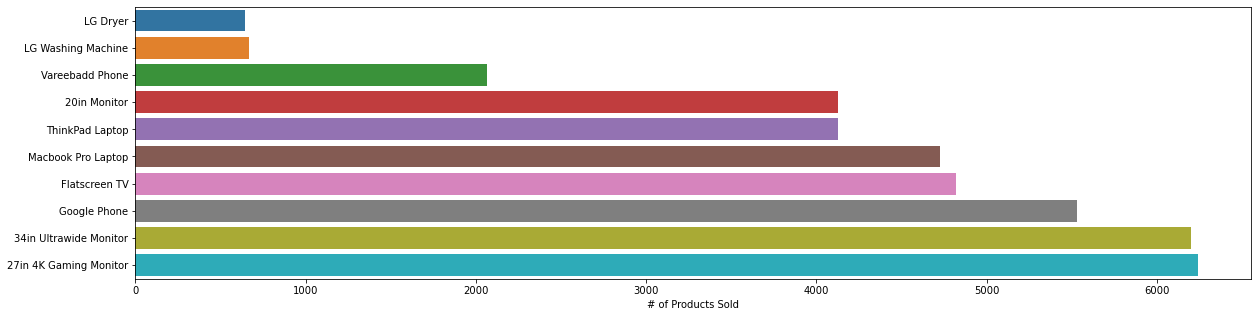

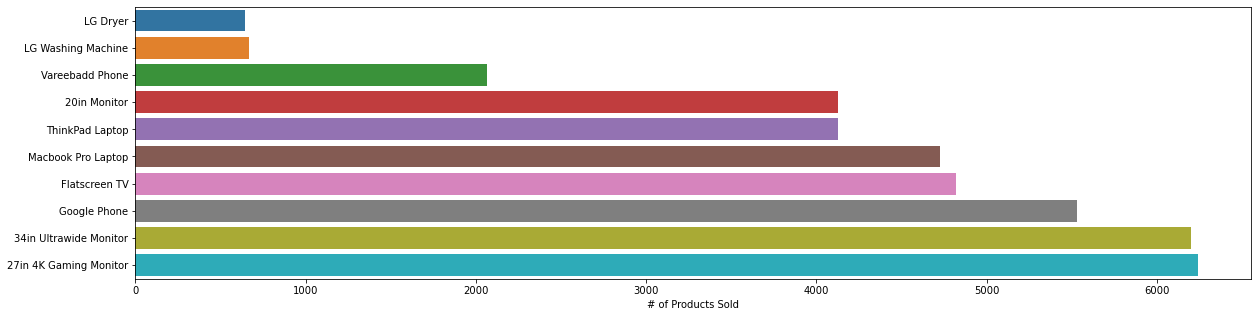

In [62]:
plt.figure(figsize=(20,5))
product_by_orders = data.groupby('Product')['Quantity Ordered'].sum().reset_index()
sns.barplot(x='Quantity Ordered', y='Product', data=product_by_orders.sort_values(by='Quantity Ordered').head(10))
plt.xlabel('# of Products Sold')
plt.ylabel('')
plt.savefig('Bot 10 Items Overtime')
plt.show('')

Top 10 Products by Revenue

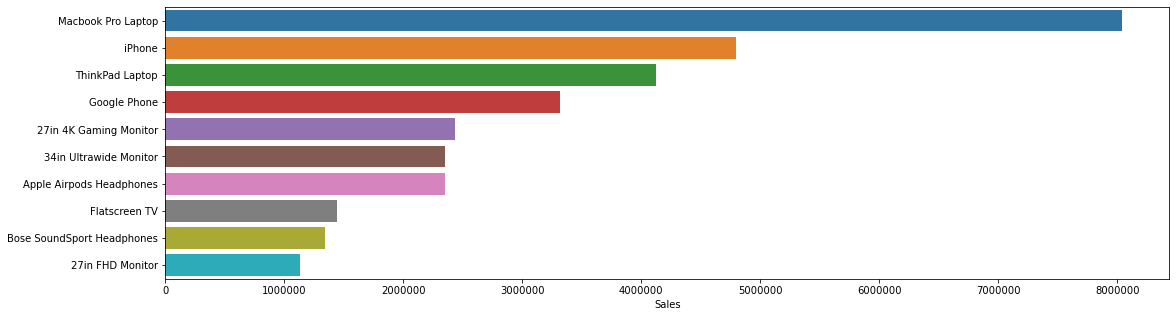

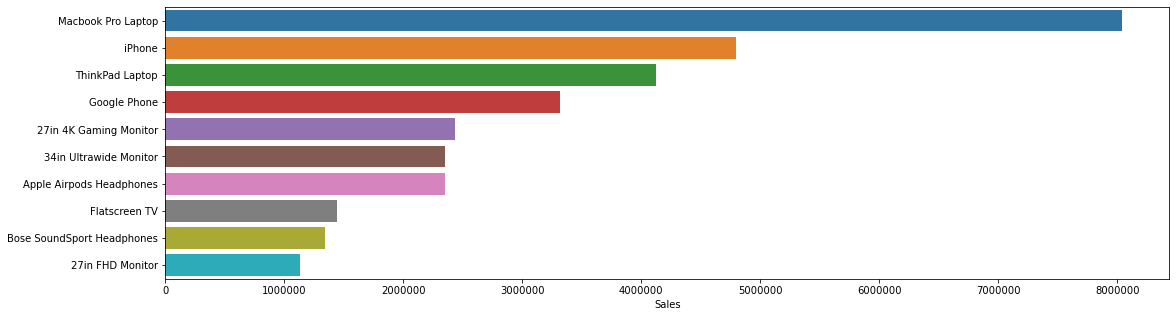

In [63]:
plt.figure(figsize=(18,5))
product_by_orders = data.groupby('Product')['Total'].sum().reset_index()
sns.barplot(x='Total', y='Product', data=product_by_orders.sort_values(by='Total', ascending=False).head(10))
plt.xlabel('Sales')
plt.ylabel('')
plt.ticklabel_format(style='plain', axis='x')
plt.savefig('Top 10 Items by Sales')
plt.show('')

Unit Price vs Quantity Sold

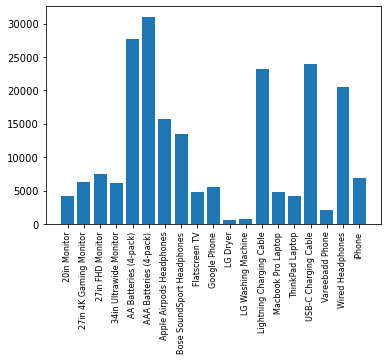

In [64]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

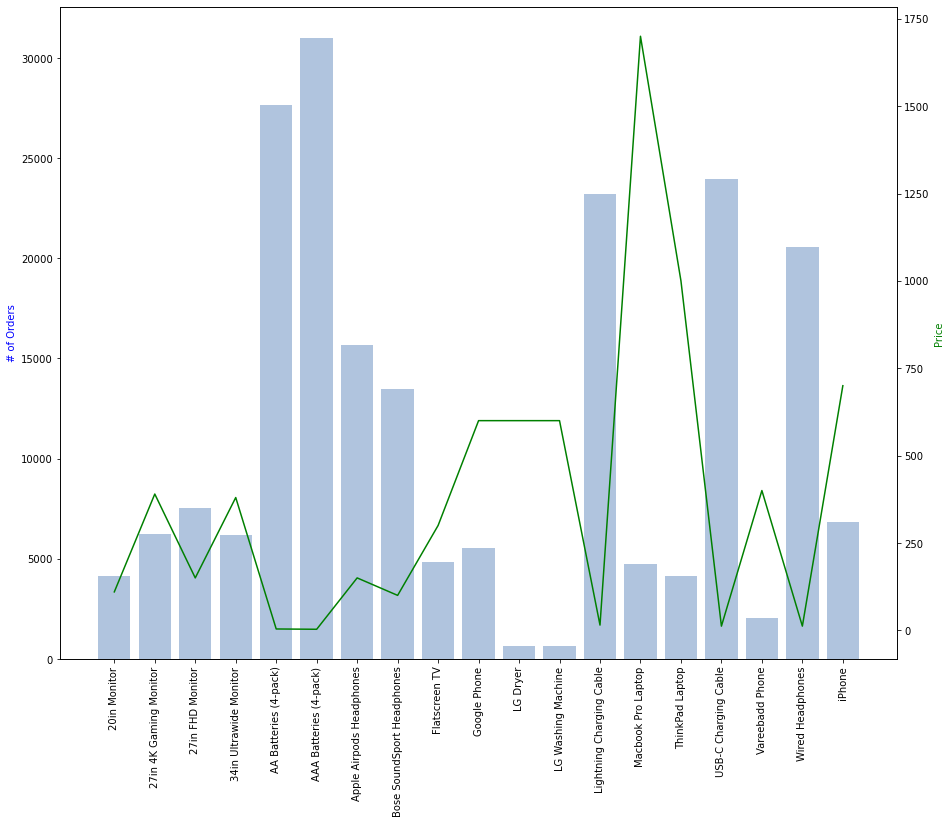

In [65]:
prices = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots(figsize=(15,12))

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='lightsteelblue')
ax2.plot(keys, prices, color='g')

ax1.set_xlabel('')
ax1.set_ylabel('# of Orders', color='b')
ax2.set_ylabel('Price', color='g')
ax1.set_xticklabels(keys, rotation=90)

fig.show()
plt.savefig('Quantity vs Price')

In [66]:
data['City'] = data['City'].str.strip()

sf = data[data['City'] == 'San Francisco']
la = data[data['City'] == 'Los Angeles']
ny = data[data['City'] == 'New York City']

San Francisco

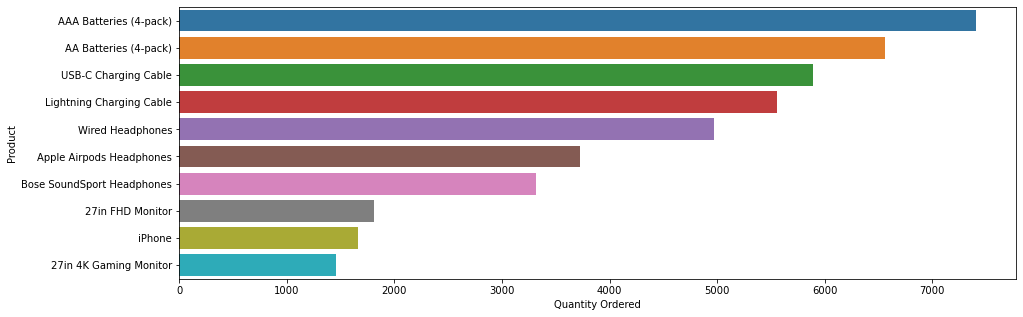

In [67]:
sf_orders_items = sf.groupby('Product')['Quantity Ordered'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x='Quantity Ordered', y='Product', data=sf_orders_items.sort_values(by='Quantity Ordered', ascending=False).head(10))
plt.savefig('sf_items')

Los Angeles

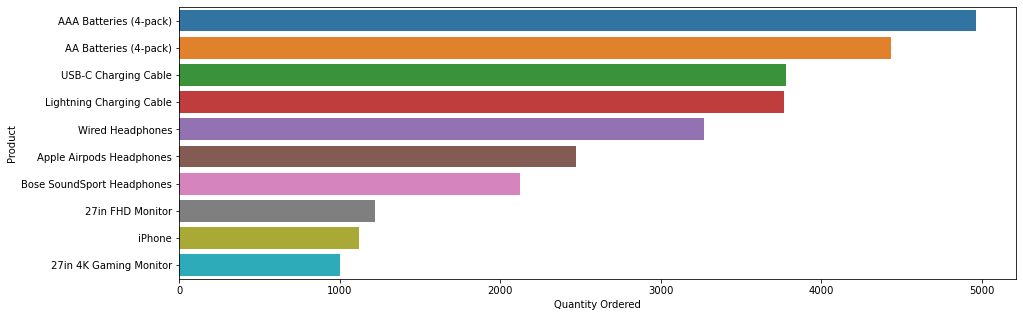

In [68]:
la_orders_items = la.groupby('Product')['Quantity Ordered'].sum().reset_index()
plt.figure(figsize=(15,5))

sns.barplot(x='Quantity Ordered', y='Product', data=la_orders_items.sort_values(by='Quantity Ordered', ascending=False).head(10))
plt.savefig('la_items')

New York City

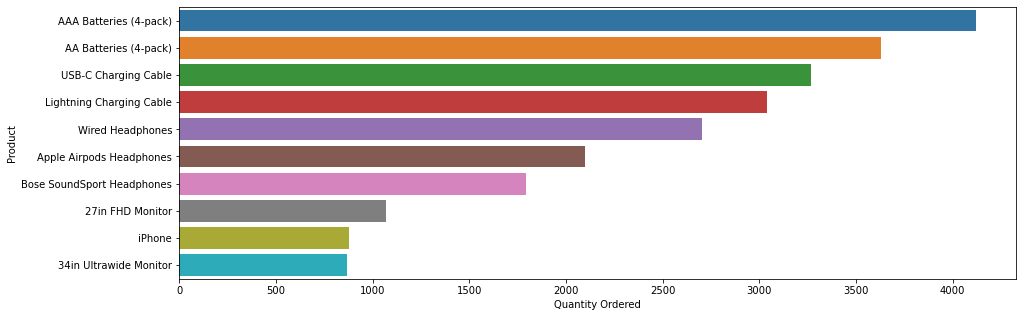

In [69]:
ny_orders_items = ny.groupby('Product')['Quantity Ordered'].sum().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x='Quantity Ordered', y='Product', data=ny_orders_items.sort_values(by='Quantity Ordered', ascending=False).head(10))
plt.savefig('ny_items')

Quantity Distribution

In [70]:
data['Quantity Ordered'].describe()

count    185916.000000
mean          1.124368
std           0.442749
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Quantity Ordered, dtype: float64

In [71]:
batteries_AAA = data[data['Product'] == 'AAA Batteries (4-pack)']
batteries_AAA.groupby('Product')['Quantity Ordered'].value_counts()

Product                 Quantity Ordered
AAA Batteries (4-pack)  1                   13724
                        2                    4630
                        3                    1501
                        4                     524
                        5                     166
                        6                      63
                        7                      22
                        8                       5
                        9                       3
Name: Quantity Ordered, dtype: int64

<AxesSubplot:xlabel='Quantity Ordered', ylabel='count'>

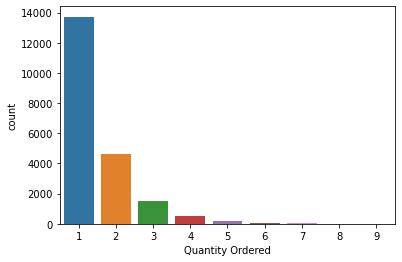

In [72]:
sns.countplot(batteries_AAA['Quantity Ordered'])

Monthly Orders

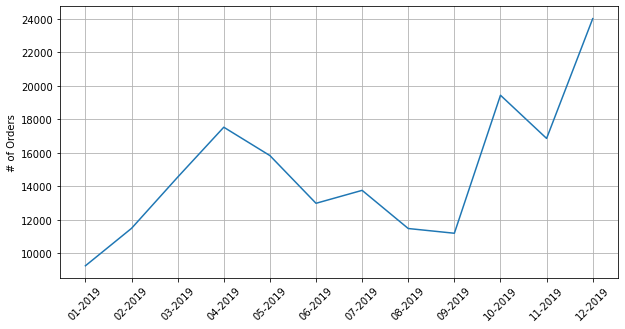

In [73]:
monthly_orders = data.set_index('Order Date')['Order ID'].resample('M').nunique()

ax = pd.DataFrame(monthly_orders.values).plot(
    grid=True,
    figsize=(10,5),
    legend=False
)

# ax.set_xlabel('date')
ax.set_ylabel('# of Orders')
# ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders.index)), 
    [x.strftime('%m-%Y') for x in monthly_orders.index], 
    rotation=45
)

# plt.show()
plt.savefig('Total Number of Orders Over Time')

In [74]:
monthly_orders 

Order Date
2019-01-31     9262
2019-02-28    11496
2019-03-31    14549
2019-04-30    17528
2019-05-31    15836
2019-06-30    12989
2019-07-31    13761
2019-08-31    11484
2019-09-30    11202
2019-10-31    19436
2019-11-30    16859
2019-12-31    24004
Freq: M, Name: Order ID, dtype: int64

In [75]:
# monthly_orders = df.set_index('Order Date')['Order ID'].resample('M').nunique()

# ax = pd.DataFrame(monthly_orders.values).plot(
#     grid=True,
#     figsize=(10,7),
#     legend=False
# )

# # ax.set_xlabel('date')
# ax.set_ylabel('# of Orders')
# ax.set_title('Total Number of Orders Over Time')

# plt.xticks(
#     range(len(monthly_orders.index)), 
#     [x.strftime('%m-%Y') for x in monthly_orders.index], 
#     rotation=45
# )

# plt.show()

Monthly Revenue

In [76]:
monthly_revenue_df = data.set_index('Order Date')['Total'].resample('M').sum()
monthly_revenue_df

Order Date
2019-01-31    1813586.44
2019-02-28    2202022.42
2019-03-31    2807100.38
2019-04-30    3390670.24
2019-05-31    3152606.75
2019-06-30    2577802.26
2019-07-31    2647775.76
2019-08-31    2244467.88
2019-09-30    2097560.13
2019-10-31    3736726.88
2019-11-30    3199603.20
2019-12-31    4613443.34
Freq: M, Name: Total, dtype: float64

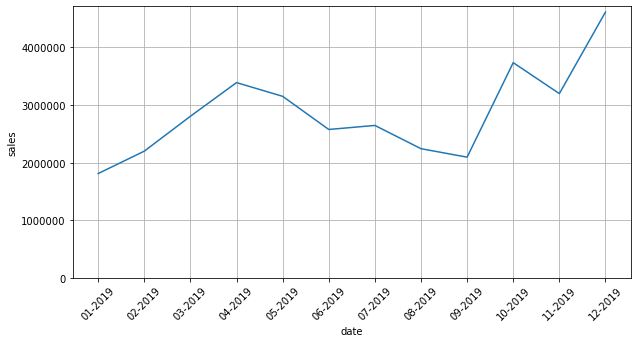

In [77]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,5),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
# ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(
    range(len(monthly_revenue_df.index)), 
    [x.strftime('%m-%Y') for x in monthly_revenue_df.index], 
    rotation=45
)

# plt.show()
plt.savefig('Total Revenue Over Time')

In [78]:
date_item_df = pd.DataFrame(
    data.set_index('Order Date').groupby([
        pd.Grouper(freq='M'), 'Product'
    ])['Quantity Ordered'].sum()
)
date_item_df

Quantity Ordered
Order Date Product                                 
2019-01-31 20in Monitor                         215
           27in 4K Gaming Monitor               312
           27in FHD Monitor                     419
           34in Ultrawide Monitor               314
           AA Batteries (4-pack)               1424
...                                             ...
2019-12-31 ThinkPad Laptop                      539
           USB-C Charging Cable                3250
           Vareebadd Phone                      284
           Wired Headphones                    2749
           iPhone                               906

[228 rows x 1 columns]

In [79]:
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2019-12-31'].sort_values(
    by='Quantity Ordered', ascending=False
).reset_index()

last_month_sorted_df

,Order Date,Product,Quantity Ordered
0,2019-12-31,AAA Batteries (4-pack),4241
1,2019-12-31,AA Batteries (4-pack),3724
2,2019-12-31,USB-C Charging Cable,3250
3,2019-12-31,Lightning Charging Cable,3087
4,2019-12-31,Wired Headphones,2749
5,2019-12-31,Apple Airpods Headphones,2076
6,2019-12-31,Bose SoundSport Headphones,1824
7,2019-12-31,27in FHD Monitor,962
8,2019-12-31,iPhone,906
9,2019-12-31,27in 4K Gaming Monitor,864


In [80]:
items = ['AAA Batteries (4-pack)','AA Batteries (4-pack)','USB-C Charging Cable','Lightning Charging Cable','Wired Headphones']

In [81]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(data.loc[
     data['Product'].isin(items)
    ].set_index('Order Date').groupby([
        pd.Grouper(freq='M'), 'Product'
    ])['Quantity Ordered'].sum()
)
date_item_df

Quantity Ordered
Order Date Product                                   
2019-01-31 AA Batteries (4-pack)                 1424
           AAA Batteries (4-pack)                1595
           Lightning Charging Cable              1149
           USB-C Charging Cable                  1283
           Wired Headphones                      1081
2019-02-28 AA Batteries (4-pack)                 1735
           AAA Batteries (4-pack)                1972
           Lightning Charging Cable              1499
           USB-C Charging Cable                  1654
           Wired Headphones                      1279
2019-03-31 AA Batteries (4-pack)                 2216
           AAA Batteries (4-pack)                2479
           Lightning Charging Cable              1873
           USB-C Charging Cable                  1944
           Wired Headphones                      1664
2019-04-30 AA Batteries (4-pack)                 2821
           AAA Batteries (4-pack)                2939
           Lightning Charging Cable              2373
           USB-C Charging Cable                  2269
           Wired Headphones                      2065
2019-05-31 AA Batteries (4-pack)                 2384
           AAA Batteries (4-pack)                2927
           Lightning Charging Cable              2075
           USB-C Charging Cable                  2068
           Wired Headphones                      1876
2019-06-30 AA Batteries (4-pack)                 2096
           AAA Batteries (4-pack)                2162
           Lightning Charging Cable              1687
           USB-C Charging Cable                  1675
           Wired Headphones                      1474
2019-07-31 AA Batteries (4-pack)                 2071
           AAA Batteries (4-pack)                2365
           Lightning Charging Cable              1811
           USB-C Charging Cable                  1849
           Wired Headphones                      1565
2019-08-31 AA Batteries (4-pack)                 1828
           AAA Batteries (4-pack)                2021
           Lightning Charging Cable              1443
           USB-C Charging Cable                  1462
           Wired Headphones                      1291
2019-09-30 AA Batteries (4-pack)                 1771
           AAA Batteries (4-pack)                1923
           Lightning Charging Cable              1432
           USB-C Charging Cable                  1594
           Wired Headphones                      1301
2019-10-31 AA Batteries (4-pack)                 2940
           AAA Batteries (4-pack)                3363
           Lightning Charging Cable              2572
           USB-C Charging Cable                  2667
           Wired Headphones                      2274
2019-11-30 AA Batteries (4-pack)                 2625
           AAA Batteries (4-pack)                3025
           Lightning Charging Cable              2210
           USB-C Charging Cable                  2256
           Wired Headphones                      1934
2019-12-31 AA Batteries (4-pack)                 3724
           AAA Batteries (4-pack)                4241
           Lightning Charging Cable              3087
           USB-C Charging Cable                  3250
           Wired Headphones                      2749

In [82]:
trending_itmes_df = date_item_df.reset_index().pivot('Order Date','Product').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('Order Date')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)

trending_itmes_df

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Order Date,,,,,
2019-01-31,1424,1595,1149,1283,1081
2019-02-28,1735,1972,1499,1654,1279
2019-03-31,2216,2479,1873,1944,1664
2019-04-30,2821,2939,2373,2269,2065
2019-05-31,2384,2927,2075,2068,1876
2019-06-30,2096,2162,1687,1675,1474
2019-07-31,2071,2365,1811,1849,1565
2019-08-31,1828,2021,1443,1462,1291
2019-09-30,1771,1923,1432,1594,1301


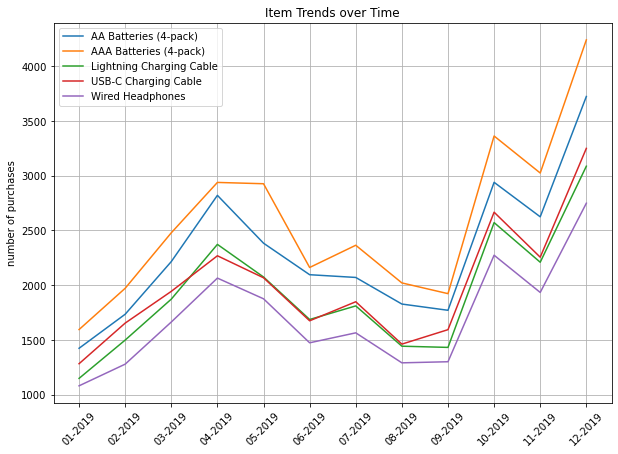

In [83]:
ax = pd.DataFrame(trending_itmes_df.values).plot(
    figsize=(10,7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_itmes_df.index)), 
    [x.strftime('%m-%Y') for x in trending_itmes_df.index], 
    rotation=45
)

plt.show()

In [84]:
city_revenue = data.groupby('City')['Total'].sum().reset_index()
city_revenue['%'] = (city_revenue['Total'] / city_revenue['Total'].sum()) * 100
city_revenue

,City,Total,%
0,Atlanta,2795498.58,8.106803
1,Austin,1819081.77,5.275244
2,Boston,3660315.12,10.614727
3,Dallas,2766260.45,8.022014
4,Los Angeles,5451570.81,15.809277
5,New York City,4662976.81,13.522395
6,Portland,2320337.62,6.728861
7,San Francisco,8259719.03,23.952764
8,Seattle,2747605.49,7.967916


In [85]:
(11549773-6989803)/6989803

0.6523746091270384

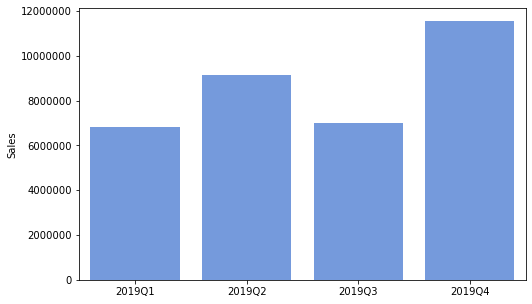

In [86]:
data['Quarter'] = data['Order Date'].dt.to_period('Q')
quarter_revenue = data.groupby('Quarter')['Total'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Quarter', y='Total', data=quarter_revenue, color='cornflowerblue')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('')
plt.ylabel('Sales')
plt.savefig('Quarter Sales')
plt.show()

In [87]:
quarter_revenue

,Quarter,Total
0,2019Q1,6822709.24
1,2019Q2,9121079.25
2,2019Q3,6989803.77
3,2019Q4,11549773.42
